In [ ]:
# Section 1: Utility Libraries
import numpy as np
import pandas as pd
import locale
from math import sqrt
from IPython.display import display, HTML

# Section 2: Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


In [3]:
display(HTML("<style>div.output_scroll { height: 10em; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Medallions
- predict number of total rides, number of medallion rides

## data_reports_monthly


**clean data**

In [4]:
data_reports_monthly = pd.read_csv('data_reports_monthly.csv')
data_reports_monthly.columns = data_reports_monthly.columns.str.strip()


In [5]:
# Make month/year index

data_reports_monthly['Month/Year'] = pd.to_datetime(data_reports_monthly['Month/Year'])
data_reports_monthly.set_index('Month/Year', inplace=True)



In [6]:
# Replace commas

data_reports_monthly = data_reports_monthly.replace({',': ''}, regex=True)

# Convert numeric columns to numeric
cols = data_reports_monthly.columns.drop(['License Class'])
data_reports_monthly[cols] = data_reports_monthly[cols].apply(pd.to_numeric, errors='coerce')

# Calculate Avg Trips per Vehicle
data_reports_monthly['Avg Trips per Vehicle'] = data_reports_monthly['Trips Per Day'] / data_reports_monthly['Vehicles Per Day']


**inspect**

In [7]:
data_reports_monthly.columns.tolist()

['License Class',
 'Trips Per Day',
 'Farebox Per Day',
 'Unique Drivers',
 'Unique Vehicles',
 'Vehicles Per Day',
 'Avg Days Vehicles on Road',
 'Avg Hours Per Day Per Vehicle',
 'Avg Days Drivers on Road',
 'Avg Hours Per Day Per Driver',
 'Avg Minutes Per Trip',
 'Percent of Trips Paid with Credit Card',
 'Trips Per Day Shared',
 'Avg Trips per Vehicle',
 'Average Daily Rev',
 'Avg Trip Value',
 'Avg Trip Val Based on Fairbox/Total Trips',
 'Annualized Rev']

In [8]:
data_reports_monthly['License Class'].value_counts()

Yellow               159
Green                116
FHV - Livery          99
FHV - Black Car       99
FHV - High Volume     99
FHV - Lux Limo        99
Name: License Class, dtype: int64

# Line Plots

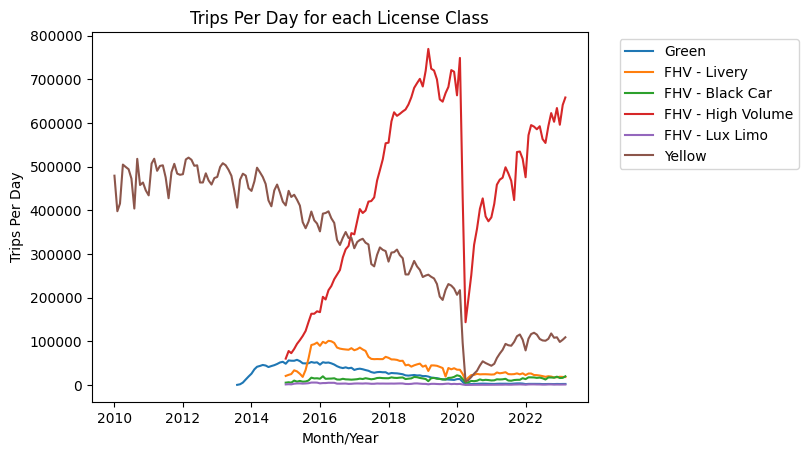

In [9]:

# Get a list of unique license classes
license_classes = data_reports_monthly['License Class'].unique()

# Create a separate line plot for each license class
for license_class in license_classes:
    subset = data_reports_monthly[data_reports_monthly['License Class'] == license_class]
    plt.plot(subset['Trips Per Day'], label=license_class)

# Add title and labels
plt.title('Trips Per Day for each License Class')
plt.xlabel('Month/Year')
plt.ylabel('Trips Per Day')

# Add a legend outside the plot to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


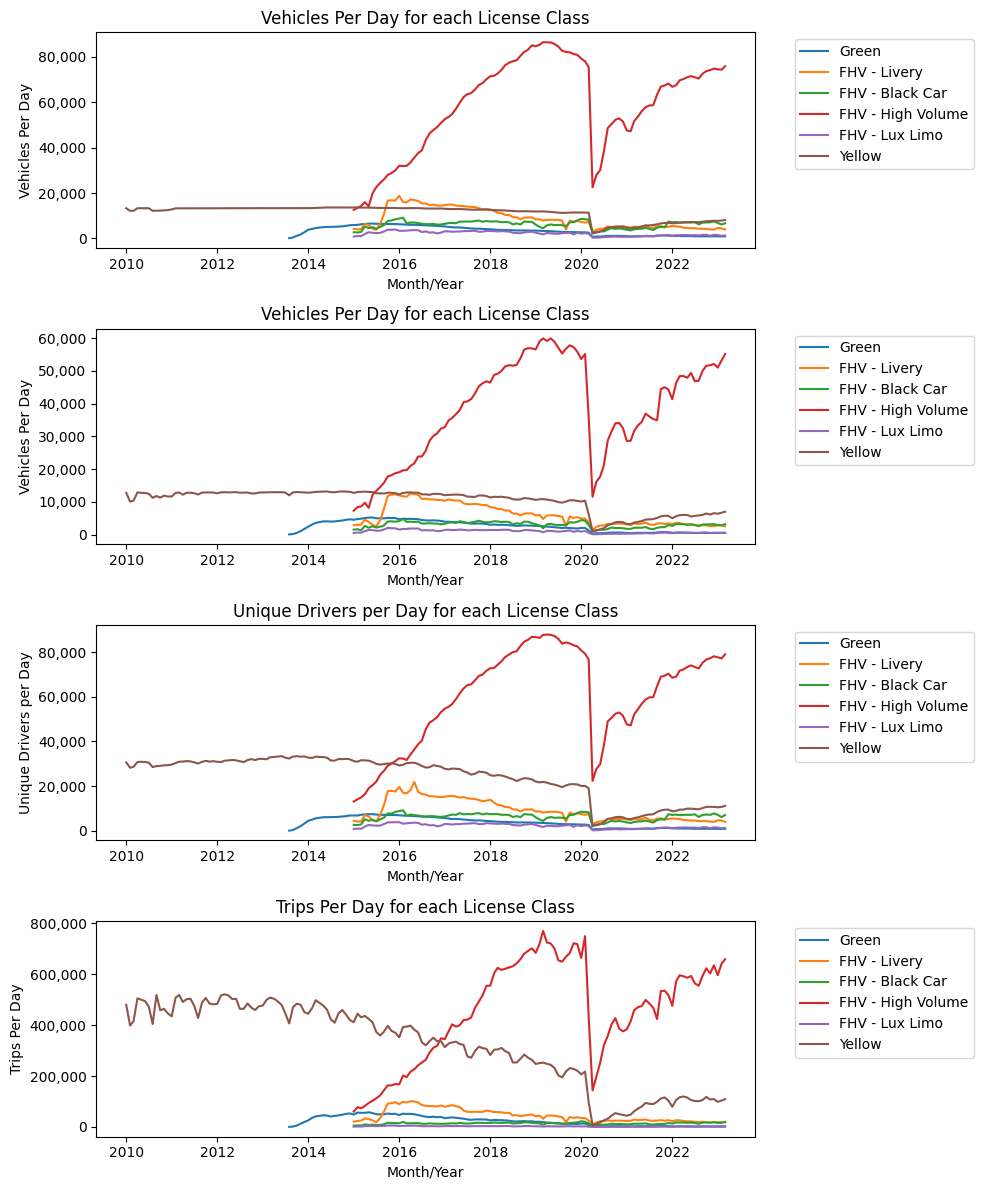

In [10]:
# Set the locale for y-axis formatting
locale.setlocale(locale.LC_ALL, '')

# Get a list of unique license classes
license_classes = data_reports_monthly['License Class'].unique()

# Create a figure with four subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# Define the data and labels for each subplot
plot_data = [
    ('Unique Vehicles', 'Vehicles Per Day'),
    ('Vehicles Per Day', 'Vehicles Per Day'),
    ('Unique Drivers', 'Unique Drivers per Day'),
    ('Trips Per Day', 'Trips Per Day')
]

# Iterate over the subplots and plot the data
for i, (column, ylabel) in enumerate(plot_data):
    ax = axs[i]
    ax.yaxis.set_major_formatter(lambda x, pos: '{:,.0f}'.format(x))
    
    for license_class in license_classes:
        subset = data_reports_monthly[data_reports_monthly['License Class'] == license_class]
        ax.plot(subset[column], label=license_class)

    ax.set_title(f'{ylabel} for each License Class')
    ax.set_xlabel('Month/Year')
    ax.set_ylabel(ylabel)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


# Yellow x High Volume Correlation

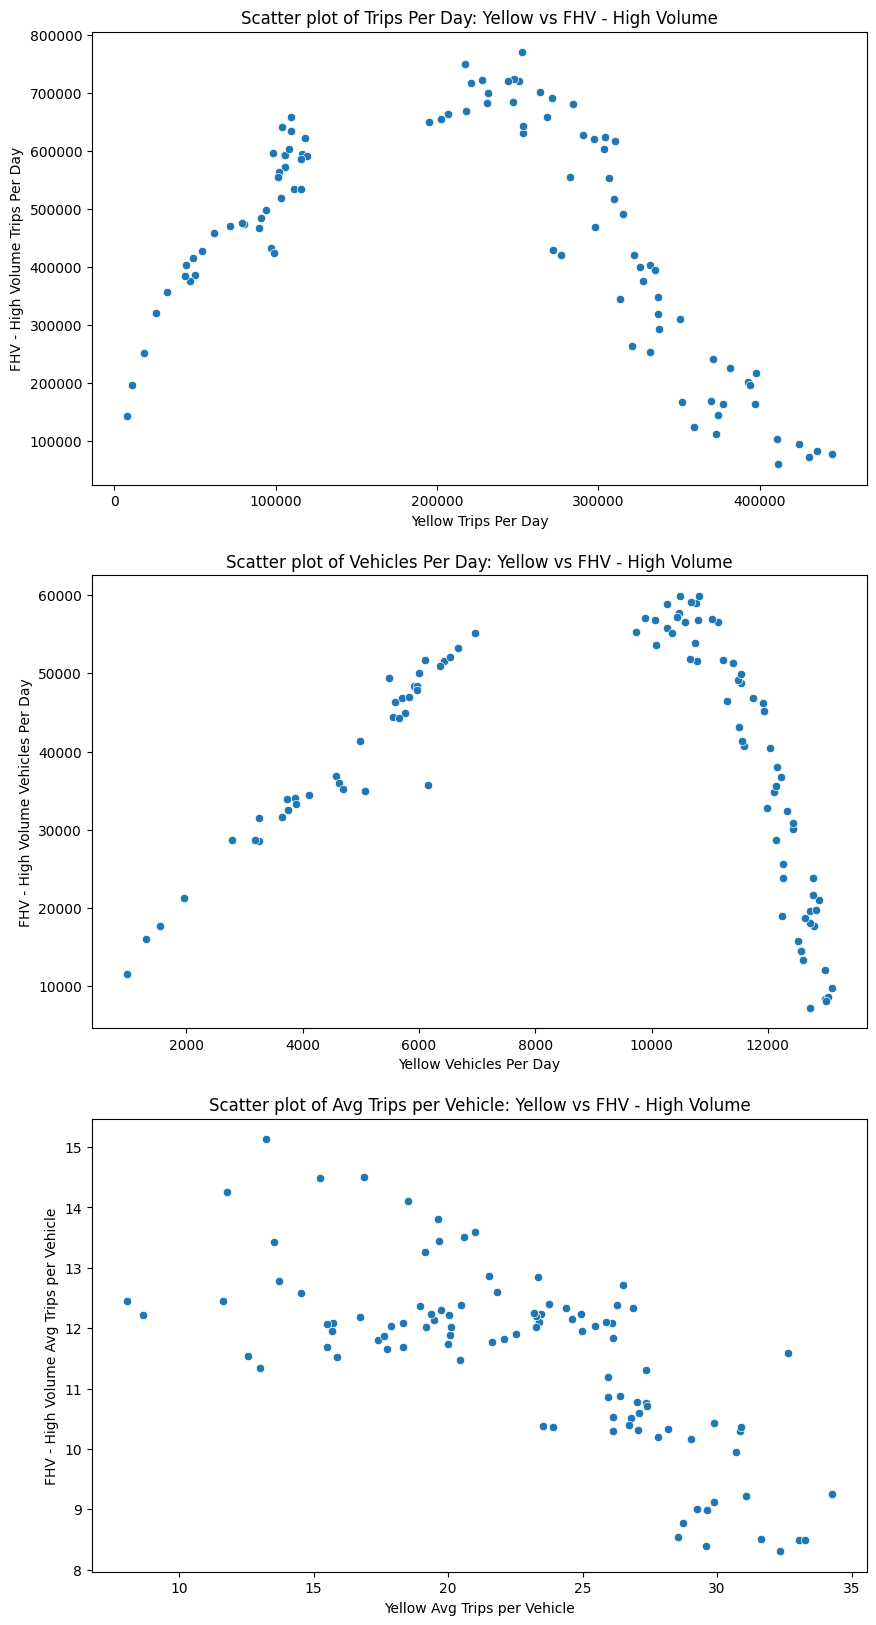

In [75]:
# Create a figure and axes
fig, ax = plt.subplots(3, 1, figsize=(10, 20))

# Prepare data for Trips Per Day
data_yellow_trips = data_reports_monthly[data_reports_monthly['License Class'] == 'Yellow']['Trips Per Day']
data_high_volume_trips = data_reports_monthly[data_reports_monthly['License Class'] == 'FHV - High Volume']['Trips Per Day']
scatter_data_trips = pd.DataFrame({'Yellow': data_yellow_trips, 'FHV - High Volume': data_high_volume_trips}).dropna()

# Prepare data for Vehicles Per Day
data_yellow_vehicles = data_reports_monthly[data_reports_monthly['License Class'] == 'Yellow']['Vehicles Per Day']
data_high_volume_vehicles = data_reports_monthly[data_reports_monthly['License Class'] == 'FHV - High Volume']['Vehicles Per Day']
scatter_data_vehicles = pd.DataFrame({'Yellow': data_yellow_vehicles, 'FHV - High Volume': data_high_volume_vehicles}).dropna()

# Prepare data for Avg Trips per Vehicle
data_yellow_avg = data_reports_monthly[data_reports_monthly['License Class'] == 'Yellow']['Avg Trips per Vehicle']
data_high_volume_avg = data_reports_monthly[data_reports_monthly['License Class'] == 'FHV - High Volume']['Avg Trips per Vehicle']
scatter_data_avg = pd.DataFrame({'Yellow': data_yellow_avg, 'FHV - High Volume': data_high_volume_avg}).dropna()

# Create scatter plot for Trips Per Day
sns.scatterplot(x='Yellow', y='FHV - High Volume', data=scatter_data_trips, ax=ax[0])
ax[0].set_title('Scatter plot of Trips Per Day: Yellow vs FHV - High Volume')
ax[0].set_xlabel('Yellow Trips Per Day')
ax[0].set_ylabel('FHV - High Volume Trips Per Day')

# Create scatter plot for Vehicles Per Day
sns.scatterplot(x='Yellow', y='FHV - High Volume', data=scatter_data_vehicles, ax=ax[1])
ax[1].set_title('Scatter plot of Vehicles Per Day: Yellow vs FHV - High Volume')
ax[1].set_xlabel('Yellow Vehicles Per Day')
ax[1].set_ylabel('FHV - High Volume Vehicles Per Day')

# Create scatter plot for Avg Trips per Vehicle
sns.scatterplot(x='Yellow', y='FHV - High Volume', data=scatter_data_avg, ax=ax[2])
ax[2].set_title('Scatter plot of Avg Trips per Vehicle: Yellow vs FHV - High Volume')
ax[2].set_xlabel('Yellow Avg Trips per Vehicle')
ax[2].set_ylabel('FHV - High Volume Avg Trips per Vehicle')

# Display the figure
plt.show()


- Perhaphs theere will be a large jump in yellow cab rides as total number of rides increases

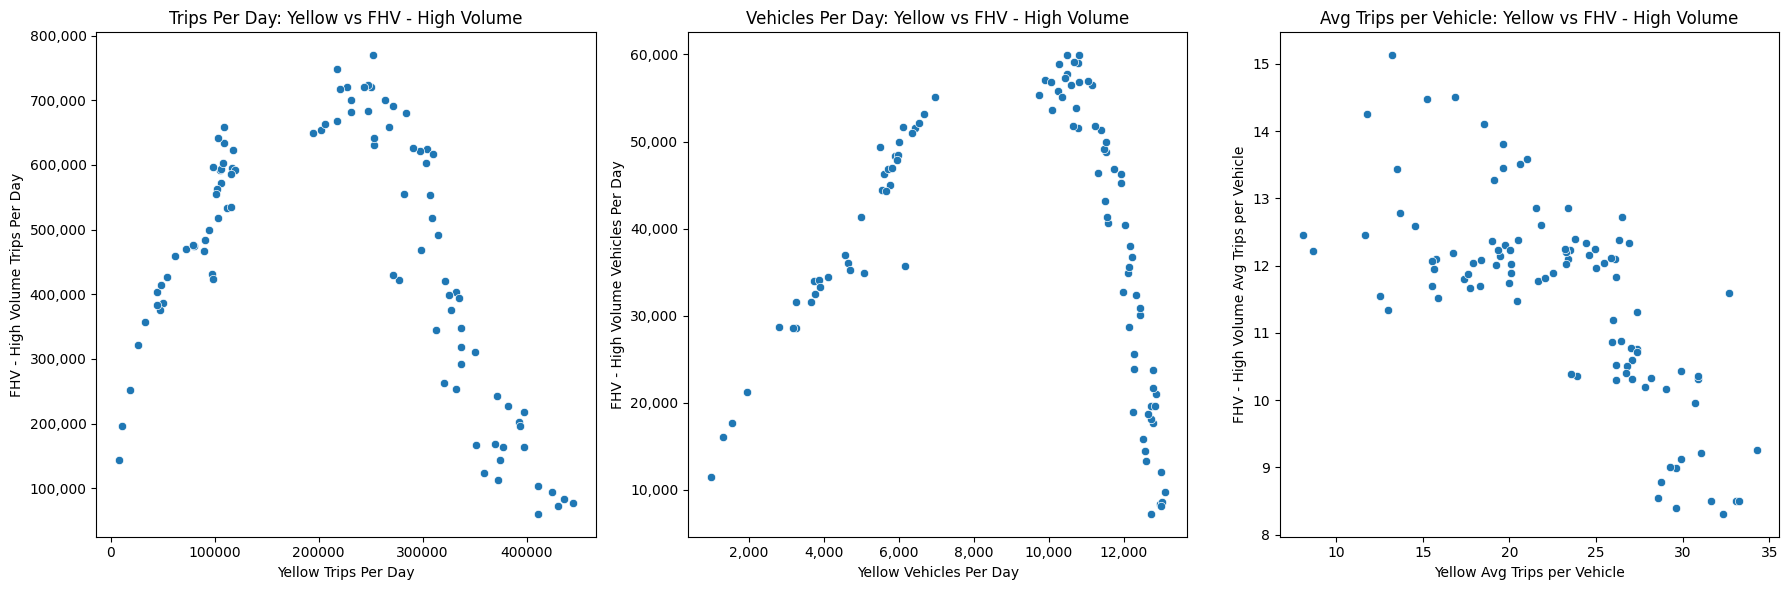

In [14]:
# Set the locale for y-axis formatting
locale.setlocale(locale.LC_ALL, '')

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Define the data and labels for each subplot
scatter_data = [
    ('Trips Per Day', 'Yellow', 'FHV - High Volume'),
    ('Vehicles Per Day', 'Yellow', 'FHV - High Volume'),
    ('Avg Trips per Vehicle', 'Yellow', 'FHV - High Volume')
]

# Iterate over the subplots and plot the scatter data
for i, (column, label1, label2) in enumerate(scatter_data):
    ax = axs[i]
    
    # Extract data for each class
    data1 = data_reports_monthly[data_reports_monthly['License Class'] == label1][column]
    data2 = data_reports_monthly[data_reports_monthly['License Class'] == label2][column]
    
    # Create a new dataframe that pairs the data for the two classes
    scatter_df = pd.DataFrame({
        label1: data1,
        label2: data2
    })
    
    # Drop rows with missing values
    scatter_df.dropna(inplace=True)
    
    # Create the scatter plot
    sns.scatterplot(x=label1, y=label2, data=scatter_df, ax=ax)
    
    ax.set_title(f'{column}: {label1} vs {label2}')
    ax.set_xlabel(f'{label1} {column}')
    ax.set_ylabel(f'{label2} {column}')
    
    # Format y-axis with comma separator
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    
    # Format x-axis with comma separator if column is 'Vehicles Per Day'
    if column == 'Vehicles Per Day':
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


# Percent of Total Rides

In [33]:
# Create a new DataFrame with relevant columns
df = data_reports_monthly[['License Class', 'Trips Per Day']].copy()

# Calculate total NYC rides per Month/Year and assign the values to 'Total NYC Rides' column
df['Total NYC Rides'] = df.groupby('Month/Year')['Trips Per Day'].sum()

# Calculate the percentage of total rides
df['Trips Percent of Total'] = df['Trips Per Day'] / df['Total NYC Rides']

# Get a list of unique license classes
license_classes = df['License Class'].unique()



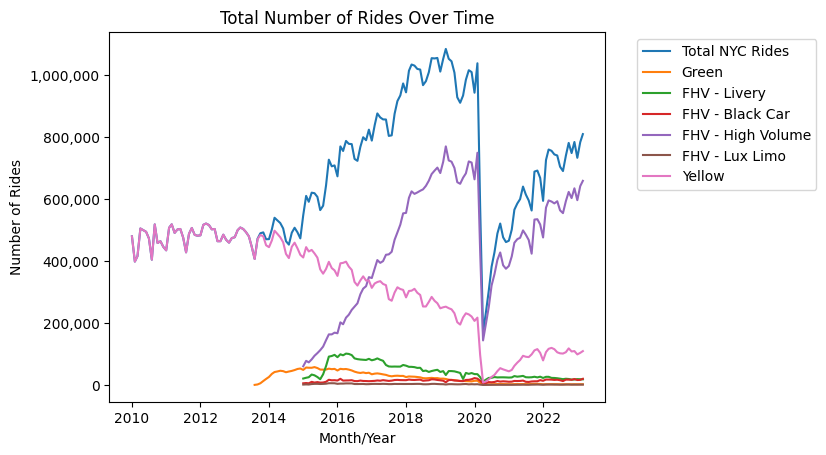

In [16]:
# Plot 'Total NYC Rides'
plt.plot(df['Total NYC Rides'], label='Total NYC Rides')

# Plot 'Trips Per Day' for each license class
for license_class in license_classes:
    subset = df[df['License Class'] == license_class]
    plt.plot(subset['Trips Per Day'], label=license_class)

# Add title and labels
plt.title('Total Number of Rides Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Number of Rides')

# Add commas as thousand separators to y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add a legend outside the plot to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


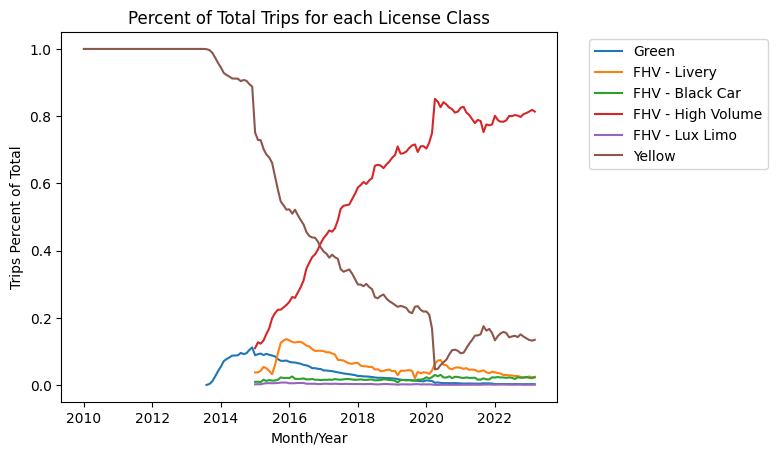

In [34]:
# Create a separate line plot for each license class
for license_class in license_classes:
    subset = df[df['License Class'] == license_class]
    plt.plot(subset['Trips Percent of Total'], label=license_class)

# Add title and labels
plt.title('Percent of Total Trips for each License Class')
plt.xlabel('Month/Year')
plt.ylabel('Trips Percent of Total')

# Add a legend outside the plot to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


# Number of Active Medallions x Ride Percentage

In [41]:
# Calculate total NYC rides per Month/Year and assign the values to 'Total NYC Rides' column
df2 = df.copy()

df2['Total Unique Drivers'] = data_reports_monthly.groupby('Month/Year')['Unique Drivers'].sum()
df2['Total Unique Vehicles'] = data_reports_monthly.groupby('Month/Year')['Unique Vehicles'].sum()
df2['Unique Drivers'] = data_reports_monthly['Unique Drivers']
df2['Unique Vehicles'] = data_reports_monthly['Unique Vehicles']


# Calculate the percentage of total rides
df2['Unique Drivers Percent of Total'] =  df2['Unique Drivers'] / df2['Total Unique Drivers']
df2['Unique Vehicles Percent of Total'] = df2['Unique Vehicles'] / df2['Total Unique Vehicles']


In [81]:
df2

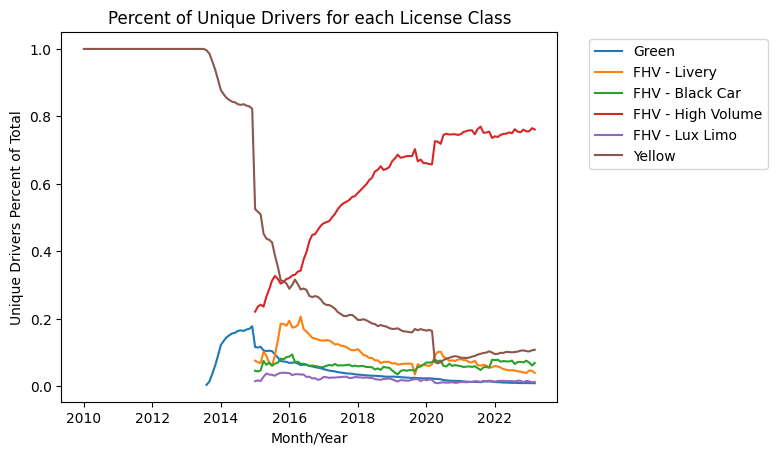

In [44]:
# Create a separate line plot for each license class
for license_class in license_classes:
    subset = df2[df2['License Class'] == license_class]
    plt.plot(subset['Unique Drivers Percent of Total'], label=license_class)

# Add title and labels
plt.title('Percent of Unique Drivers for each License Class')
plt.xlabel('Month/Year')
plt.ylabel('Unique Drivers Percent of Total')

# Add a legend outside the plot to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


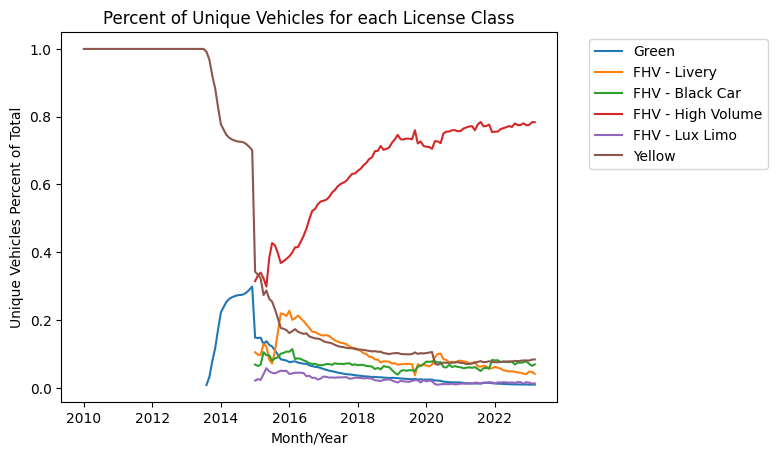

In [45]:
# Create a separate line plot for each license class
for license_class in license_classes:
    subset = df2[df2['License Class'] == license_class]
    plt.plot(subset['Unique Vehicles Percent of Total'], label=license_class)

# Add title and labels
plt.title('Percent of Unique Vehicles for each License Class')
plt.xlabel('Month/Year')
plt.ylabel('Unique Vehicles Percent of Total')

# Add a legend outside the plot to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


# Further Analysis

In [ ]:
import statsmodels.api as sm


In [65]:
license_classes = df2['License Class'].unique()

for license_class in license_classes:
    df_license_class = df2[df2['License Class'] == license_class]
    
    X = df_license_class['Unique Vehicles Percent of Total']
    y = df_license_class['Trips Per Day']

    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    print(f"R-squared for {license_class}: {results.rsquared:.3f}")


R-squared for Green: 0.448
R-squared for FHV - Livery: 0.822
R-squared for FHV - Black Car: 0.010
R-squared for FHV - High Volume: 0.614
R-squared for FHV - Lux Limo: 0.815
R-squared for Yellow: 0.663


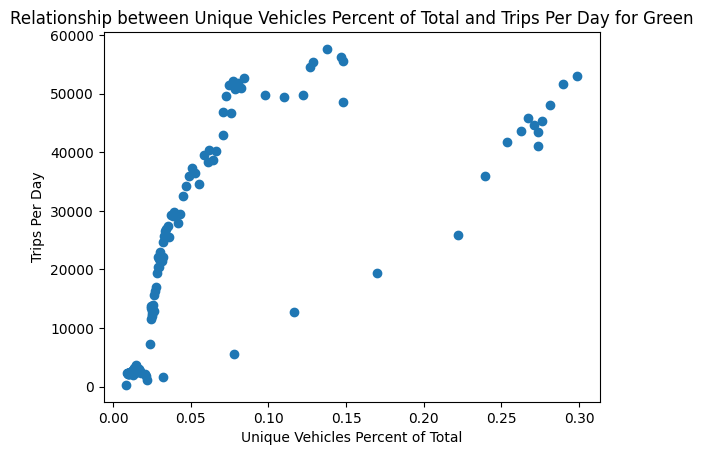

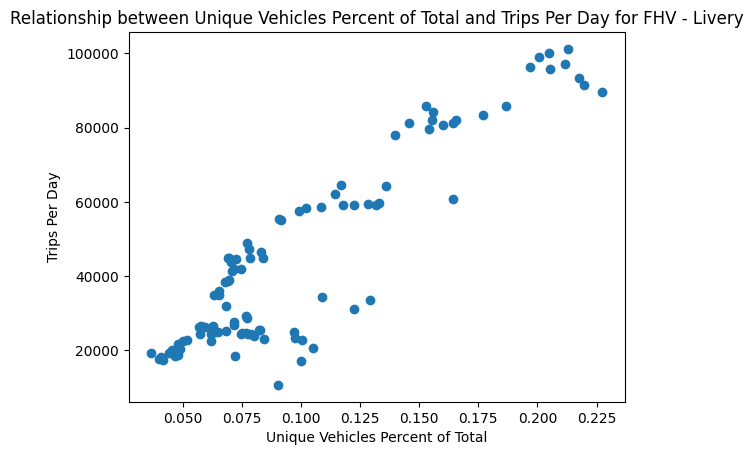

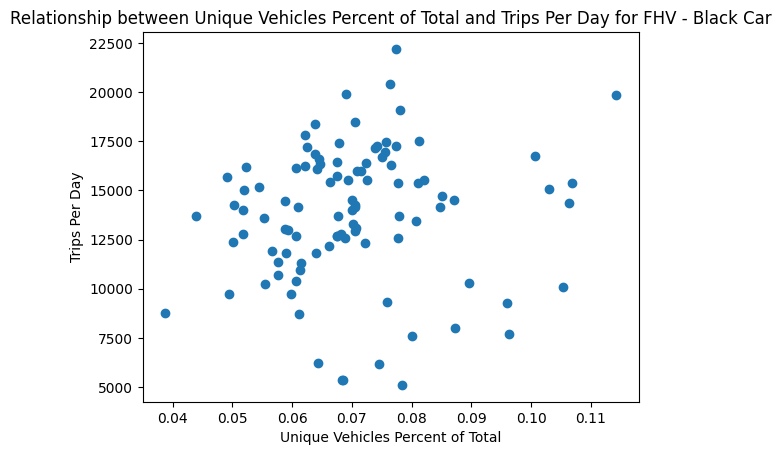

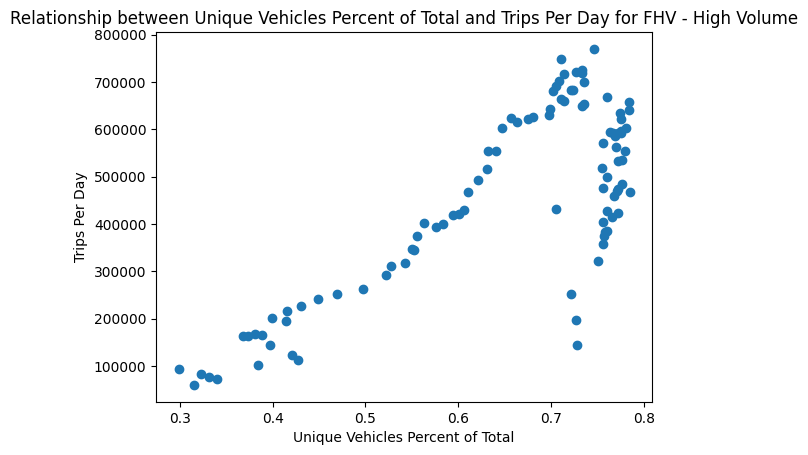

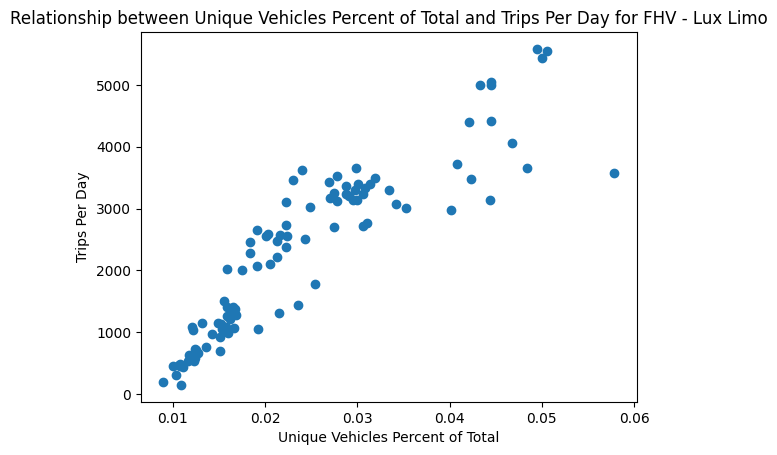

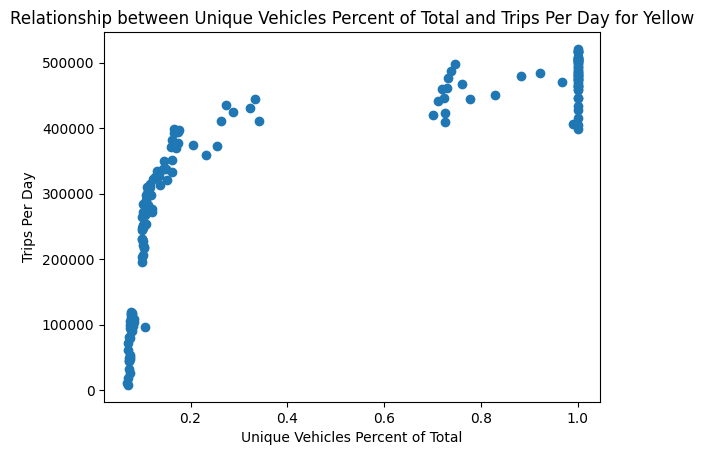

In [62]:
license_classes = df2['License Class'].unique()

for license_class in license_classes:
    df_license_class = df2[df2['License Class'] == license_class]
    
    plt.scatter(df_license_class['Unique Vehicles Percent of Total'], df_license_class['Trips Per Day'])
    plt.xlabel('Unique Vehicles Percent of Total')
    plt.ylabel('Trips Per Day')
    plt.title(f'Relationship between Unique Vehicles Percent of Total and Trips Per Day for {license_class}')
    plt.show()


In [61]:
license_classes = df2['License Class'].unique()

for license_class in license_classes:
    df_license_class = df2[df2['License Class'] == license_class]
    
    correlation = df_license_class['Trips Per Day'].corr(df_license_class['Unique Vehicles Percent of Total'])
    print(f'Correlation for {license_class}: {correlation}')

Correlation for Green: 0.6690550226727938
Correlation for FHV - Livery: 0.9066295917552634
Correlation for FHV - Black Car: 0.10047569767384483
Correlation for FHV - High Volume: 0.7837939035004676
Correlation for FHV - Lux Limo: 0.9027414095289109
Correlation for Yellow: 0.8140386600369978


## Total NYC Rides vs. Unique Vehicls

## Regression

R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. In simpler terms, it tells us how well our model explains the variability of the data.


**Total NYC Rides x Unique Vehicles percent of Total per Class**

In [67]:
license_classes = df2['License Class'].unique()

for license_class in license_classes:
    df_license_class = df2[df2['License Class'] == license_class]
    
    X = df_license_class['Total NYC Rides']
    y = df_license_class['Unique Vehicles Percent of Total']

    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    print(f"R-squared for {license_class}: {results.rsquared:.3f}")


R-squared for Green: 0.155
R-squared for FHV - Livery: 0.000
R-squared for FHV - Black Car: 0.076
R-squared for FHV - High Volume: 0.005
R-squared for FHV - Lux Limo: 0.034
R-squared for Yellow: 0.422


**Total NYC Rides x Unique Vehicles  per Class**

In [70]:
license_classes = df2['License Class'].unique()

for license_class in license_classes:
    df_license_class = df2[df2['License Class'] == license_class]
    
    X = df_license_class['Total NYC Rides']
    y = df_license_class['Unique Vehicles']

    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    print(f"R-squared for {license_class}: {results.rsquared:.3f}")


R-squared for Green: 0.030
R-squared for FHV - Livery: 0.155
R-squared for FHV - Black Car: 0.414
R-squared for FHV - High Volume: 0.469
R-squared for FHV - Lux Limo: 0.379
R-squared for Yellow: 0.009


Yellow: An R-squared of 0.422 indicates that our model explains about 42.2% of the variability in the percentage of total unique vehicles for the Yellow license class. This is a higher value compared to the other license classes, suggesting that Total NYC Rides has a more significant impact on the percentage of total unique vehicles in the Yellow license class. However, more than half of the variability is still unexplained by our model, indicating the presence of other significant factors.



## Corrolation

The correlation coefficient is a statistical measure that calculates the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the movement of the two variables.


**Total NYC Rides x Unique Vehicles per Class**

In [71]:
license_classes = df2['License Class'].unique()

for license_class in license_classes:
    df_license_class = df2[df2['License Class'] == license_class]
    
    correlation = df_license_class['Total NYC Rides'].corr(df_license_class['Unique Vehicles'])
    print(f'Correlation for {license_class}: {correlation}')
    

Correlation for Green: 0.17213014284713468
Correlation for FHV - Livery: 0.3932404833907357
Correlation for FHV - Black Car: 0.6431764425980463
Correlation for FHV - High Volume: 0.684835796094719
Correlation for FHV - Lux Limo: 0.615552339964714
Correlation for Yellow: 0.09259344268806456


FHV - High Volume: A correlation of 0.685 shows a strong positive relationship between Total NYC Rides and Unique Vehicles for the FHV - High Volume license class. This suggests that the unique vehicles for the High Volume class increases significantly as the total number of rides increases.

Yellow: A correlation of 0.093 suggests a very weak positive relationship between Total NYC Rides and Unique Vehicles for the Yellow license class. This means that as the number of Total NYC Rides increases, the Unique Vehicles for the Yellow class tend to slightly increase, but the relationship is not strong.



**NYC Rides x Unique Vehicles Percent of Total per Class**

In [68]:
license_classes = df2['License Class'].unique()

for license_class in license_classes:
    df_license_class = df2[df2['License Class'] == license_class]
    
    correlation = df_license_class['Total NYC Rides'].corr(df_license_class['Unique Vehicles Percent of Total'])
    print(f'Correlation for {license_class}: {correlation}')

Correlation for Green: -0.39345554346634465
Correlation for FHV - Livery: -0.010982349602877936
Correlation for FHV - Black Car: -0.2763164755286644
Correlation for FHV - High Volume: 0.06760884695678923
Correlation for FHV - Lux Limo: 0.1855282250437802
Correlation for Yellow: -0.6494612754462252


Yellow: A correlation of -0.649 suggests a strong negative relationship between Total NYC Rides and Unique Vehicles Percent of Total for the Yellow license class. This means that as the number of Total NYC Rides increases, the Unique Vehicles Percent of Total for the Yellow class tends to decrease significantly.


# How does average ride value impact yellow cab active vehicles?

# How do we begin to understand th impact of the inactive medallions?
- More rides per medallion
- Higher revenue per medallion
- Inflated value of annual revenue